In [1]:
# import necessary libraries

from tensorflow import keras
import imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
import pygame
import pygame.camera
import time
import keyboard
import random

pygame 2.1.2 (SDL 2.0.18, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Load in the trained model

model = keras.models.load_model("Desktop/datasets/model.h5")

In [3]:
# Output text color to improve presentation
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# function to prepare image for the model
def process_img(img):
    img = Image.fromarray(img)
    old_size = img.size
    if img.height != 300 or img.width != 300:
        new_size = (300, 300)
        new_im = Image.new("RGB", new_size,color='white')   
        new_im.paste(img, ((new_size[0]-old_size[0])//2,
                              (new_size[1]-old_size[1])//2))
    return np.asarray(new_im.convert("L")).reshape(1,300,300,1)

# function that predicts from the model
def prediction(img):
    plt.imshow(img.reshape(300,300),cmap='gray')
    plt.axis('off')
    plt.show()
    img = img / 255
    prediction = model.predict(img)
    return np.argmax(prediction)
    
# CAMERA
def camera():
    pygame.camera.init()
    cam = pygame.camera.Camera("Integrated Camera",(300,300))
    cam.start()
    time.sleep(1)
    img = cam.get_image()
    img = pygame.surfarray.array3d(img)
    cam.stop()
    pygame.camera.quit()
    return img

def start_screen():
    print(Color.BOLD + "=====================" + Color.END)
    print(Color.BOLD + "ROCK, PAPER, SCISSORS" + Color.END)
    print(Color.BOLD + "=====================" + Color.END)
    print("Press Enter to begin or Escape to quit")
    while True:
        if keyboard.is_pressed("enter"): return True
        if keyboard.is_pressed("esc"): return False
    
def display_scores(user, comp):
    print(Color.BLUE + "You have scored {} points".format(user) + Color.END)
    print(Color.RED + "The computer has scored {} points".format(comp) + Color.END)

def comp():
    print(Color.RED + "The computer has won this round." + Color.END)
    
def user():
    print(Color.BLUE + "You have won this round!" + Color.END)
    
def neither(choice):
    options = ["rock", "paper", "scissors"]
    choice = options[choice]
    print(Color.PURPLE + "No winners this round. You both picked {}".format(choice) + Color.END)
    
def choices(user, comp):
    options = ["rock", "paper", "scissors"]
    user = options[user]
    comp = options[comp]
    print("You chose {}".format(user))
    print("The computer chose {}".format(comp))
        
    
# GAME
def main():
    game = start_screen()
    user_score = 0
    comp_score = 0
    num = 1
    decision_table = [[0, -1, 1], [1, 0, -1], [-1, 1, 0]]
    while game:
        print(Color.BOLD + "============ Round {} ============".format(num) + Color.END)
        print(Color.DARKCYAN + "Press Space to take a picture of your hand" + Color.END)
        keyboard.wait("space")
        img = camera()
        img = process_img(img)
        pred = prediction(img)
        choice = random.randint(0,2)
        decision = decision_table[pred][choice]
        if decision == 0:
            neither(decision)
            display_scores(user_score, comp_score)
        elif decision == 1:
            user_score += 1
            choices(pred, choice)
            user()
            display_scores(user_score, comp_score)
        elif decision == -1:
            comp_score += 1
            choices(pred, choice)
            comp()
            display_scores(user_score, comp_score)
        if user_score == 3 or comp_score == 3: break
        num += 1
        
    if user_score == 3: 
        print(Color.GREEN + "Congratulations! You have won" + Color.END)
        print(Color.BOLD + "GAME OVER" + Color.END)
        print("Press Enter to play again or Escape to quit")
        while True:
            if keyboard.is_pressed("enter"): 
                clear_output(wait=True)
                main()
            elif keyboard.is_pressed("esc"): break
    elif comp_score == 3:
        print(Color.RED + "The computer won. Better luck next time" + Color.END)
        print(Color.BOLD + "GAME OVER" + Color.END)
        print("Press Enter to play again or Escape to quit")
        while True:
            if keyboard.is_pressed("enter"):
                clear_output()
                main()
            elif keyboard.is_pressed("esc"): break
    else:
        print(Color.BOLD + "GAME OVER" + Color.END)

ROCK, PAPER, SCISSORS
Press Enter to begin or Escape to quit
============ Round 1 ============
Press Space to take a picture of your hand


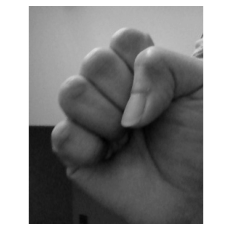

You chose rock
The computer chose paper
The computer has won this round.
You have scored 0 points
The computer has scored 1 points
============ Round 2 ============
Press Space to take a picture of your hand


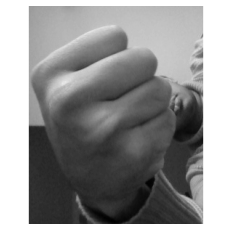

You chose rock
The computer chose paper
The computer has won this round.
You have scored 0 points
The computer has scored 2 points
============ Round 3 ============
Press Space to take a picture of your hand


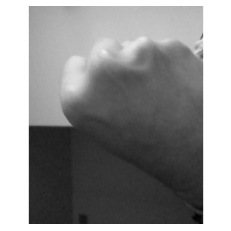

No winners this round. You both picked rock
You have scored 0 points
The computer has scored 2 points
============ Round 4 ============
Press Space to take a picture of your hand


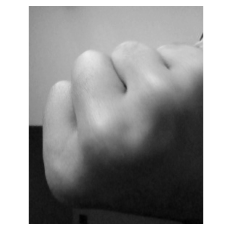

You chose rock
The computer chose paper
The computer has won this round.
You have scored 0 points
The computer has scored 3 points
The computer won. Better luck next time
GAME OVER
Press Enter to play again or Escape to quit


In [4]:
main()